# Exploratory Data Analysis (EDA)
The goal is to explore the data generated with  QGIS and make the first chart and animations

1. Explore csv. files with data generated from QGIS using 'Extractor/Zonal statistical'
2. Create NDVI chart with appropriate indicator
3. Build Timeseries animation

In [1]:
import pandas as pd

In [2]:
df2015=pd.read_csv("./data/csv/Triibo_NDVI_statistics_2015.csv")

In [3]:
df2015

,id,min,max,mean,median,std,count
0,1,0.099357,0.572,0.391251,0.40124,0.086624,107


In [4]:
df2022=pd.read_csv("./data/csv/Triibo_NDVI_statistics_2022.csv")
df2022

,id,min,max,mean,median,std,count
0,1,0.279414,0.528825,0.427138,0.428131,0.041257,107


Let's merge all the csv files in one structured dataset

In [5]:
import os
from pathlib import Path
import re
import csv

In [6]:
cwd=Path.cwd()
print(cwd)

abs=Path.absolute(cwd)
print(abs)

c:\Users\natr\Desktop\workspace\Triibo-repo\Triibo-NDVI
c:\Users\natr\Desktop\workspace\Triibo-repo\Triibo-NDVI


In [7]:
abs_str=str(abs)
data_csv = abs_str + "/data/csv"

#Let's create a list to store data
data=[]


for name in os.listdir(data_csv):
    year=re.split("[_.]",name)[-2]
    # We will add the year in a column, so we open the file
    with open(os.path.join(data_csv,name)) as f:
        reader=csv.reader(f)
        f_data=list(reader)[-1] #only interested in the data not the header
        f_data.insert(0,year)      
        data.append(f_data)

In [8]:
# Create a pandas dataframe from the data collected
columns=["year","id","min","max","avg","median","std","count"]
df_ndvi=pd.DataFrame(data, columns=columns)
df_ndvi

,year,id,min,max,avg,median,std,count
0,2015,1,0.099357255,0.57200027,0.3912505,0.40124017,0.08662366,107
1,2016,1,0.16199756,0.56398565,0.31367677,0.2998931,0.087245286,107
2,2017,1,0.1564734,0.46047166,0.29592237,0.2967851,0.06314377,107
3,2020,1,0.24401535,0.5255823,0.42098707,0.43816507,0.060751338,107
4,2021,1,0.22448353,0.46017206,0.3283361,0.32913056,0.05027125,107
5,2022,1,0.2794139,0.5288255,0.42713806,0.42813066,0.041256778,107
6,2023,1,0.22586827,0.45616132,0.33048558,0.3218013,0.054844256,107


In [9]:
#drop 'id' and 'count'
df_ndvi.drop(['id','count'], axis=1,inplace=True)
df_ndvi

,year,min,max,avg,median,std
0,2015,0.099357255,0.57200027,0.3912505,0.40124017,0.08662366
1,2016,0.16199756,0.56398565,0.31367677,0.2998931,0.087245286
2,2017,0.1564734,0.46047166,0.29592237,0.2967851,0.06314377
3,2020,0.24401535,0.5255823,0.42098707,0.43816507,0.060751338
4,2021,0.22448353,0.46017206,0.3283361,0.32913056,0.05027125
5,2022,0.2794139,0.5288255,0.42713806,0.42813066,0.041256778
6,2023,0.22586827,0.45616132,0.33048558,0.3218013,0.054844256


In [10]:
df_ndvi=df_ndvi.apply(pd.to_numeric)

#### Create the basic chart

In [11]:
import matplotlib.pyplot as plt

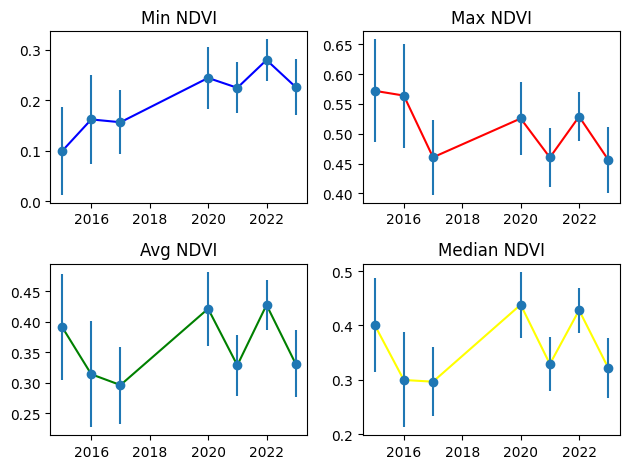

In [12]:
x=df_ndvi['year']
y1=df_ndvi['min']
y2=df_ndvi['max']
y3=df_ndvi['avg']
y4=df_ndvi['median']
std=df_ndvi['std']
yerr=std.to_list()

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x,y1, label='min', color="blue")
axs[0, 0].errorbar(x, y1,yerr=yerr, fmt='o', label="errorbar")
axs[0, 0].set_title('Min NDVI')
axs[0, 1].plot(x,y2, label='max', color="red")
axs[0, 1].errorbar(x, y2,yerr=yerr, fmt='o', label="errorbar")
axs[0, 1].set_title('Max NDVI')
axs[1, 0].plot(x,y3, label='avg', color="green")
axs[1, 0].errorbar(x, y3,yerr=yerr, fmt='o', label="errorbar")
axs[1, 0].set_title('Avg NDVI')
axs[1, 1].plot(x,y4, label='median', color="yellow")
axs[1, 1].errorbar(x, y4,yerr=yerr, fmt='o', label="errorbar")
axs[1, 1].set_title('Median NDVI')

# Add legends
#axs[0,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
#axs[0,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
#axs[1,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
#axs[1,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Customed chart
We will represent 1 chart insted of 4

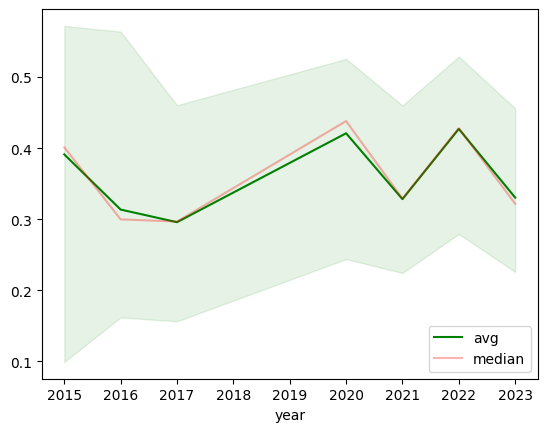

In [13]:
ax=df_ndvi.plot(x="year",y="avg", c="green")
ax.plot(df_ndvi["year"],df_ndvi["median"], label="median", c="red", alpha=0.3)
ax.fill_between(x="year",y1="min", y2="max", data=df_ndvi, color="green", alpha=0.1)
ax.legend()
plt.show()

### Timeseries Boxplot

In [14]:
import numpy as np

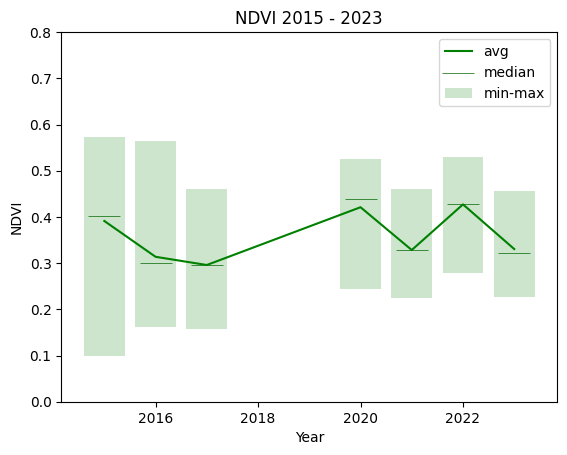

In [15]:
# Create a new figure and axis
fig, ax = plt.subplots()

min_val=df_ndvi["min"]
max_val=df_ndvi["max"]
diff=max_val-min_val

# Plot the max bars
ax.bar(df_ndvi["year"], diff, bottom=min_val, color="green", alpha=0.2, label="min-max")

# Plot the average line
ax.plot(df_ndvi["year"], df_ndvi["avg"], color="green", label="avg")

# Plot horizontal line (median)
ax.scatter(df_ndvi["year"],df_ndvi["median"], s=500,c="darkgreen", marker="_", linewidths=0.5, label="median")

# Add a trend line for the avg
z = np.polyfit(df_ndvi["year"], df_ndvi["avg"], 1)
p = np.poly1d(z)

#ax.plot(df_ndvi["year"], p(df_ndvi["year"]), label="trendline_avg", color="lightgreen", linestyle="--", linewidth=1)

#set y-axis limit
ax.set_ylim(0,0.8)

# Set axis labels and title
ax.set_xlabel("Year")
ax.set_ylabel("NDVI")
ax.set_title("NDVI 2015 - 2023")

# Add a legend
ax.legend()

# Show the plot
plt.show()


### Highlight the year with data

In [16]:
def highlight_NDVI_year(df, highlight_year, savepath="result/plot/"):
    fig, ax = plt.subplots()

    min_val=df["min"]
    max_val=df["max"]
    diff=max_val-min_val

    # Plot the max bars
    ax.bar(df["year"], diff, bottom=min_val, color="green", alpha=0.4, label="min-max")

    # Plot the average line
    ax.plot(df["year"], df["avg"], color="green",label="avg")

    # Plot horizontal line (median)
    ax.scatter(df["year"],df["median"], s=500,c="darkgreen", marker="_", linewidths=0.5, label="median")

    # Highlight the year X
    ndvi_value=float(df.loc[df['year'] == highlight_year, "avg"].iloc[0])
    max_value_y = float(df.loc[df['year'] == highlight_year,"max"].iloc[0])
    if highlight_year==2015:
        ax.axvspan(highlight_year+0.5,2023+0.5, color="white", alpha=0.6)
    elif highlight_year==2023:
        ax.axvspan(2015-0.5,highlight_year-0.5, color="white", alpha=0.6)
    else:
        ax.axvspan(2015-0.5,highlight_year-0.5, color="white", alpha=0.6)
        ax.axvspan(highlight_year+0.5,2023+0.5, color="white", alpha=0.6)

    ax.text(highlight_year-0.5, max_value_y+0.02, f"avg = {ndvi_value: .2f}")

    #set y-axis limit
    ax.set_ylim(0,0.8)

    # Set axis labels and title
    ax.set_xlabel("Year")
    ax.set_ylabel("NDVI")
    ax.set_title(f"NDVI {highlight_year}")

    # Add a legend
    ax.legend()

    #plt.show()

    # Save figure
    filename = f"{highlight_year}.png"
    full_path = os.path.join(savepath, filename)
    plt.savefig(full_path)


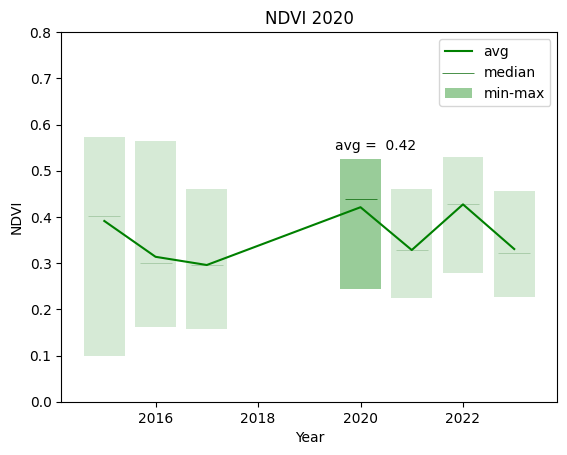

In [17]:
highlight_NDVI_year(df_ndvi, 2020)

Plot for 2015 saved!
Plot for 2016 saved!
Plot for 2017 saved!
Plot for 2020 saved!
Plot for 2021 saved!
Plot for 2022 saved!
Plot for 2023 saved!
finished!


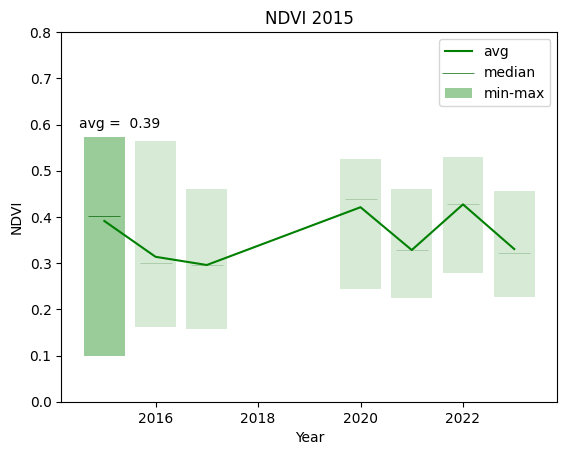

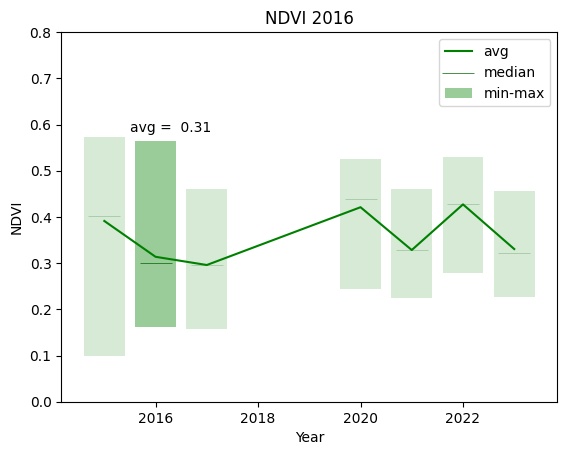

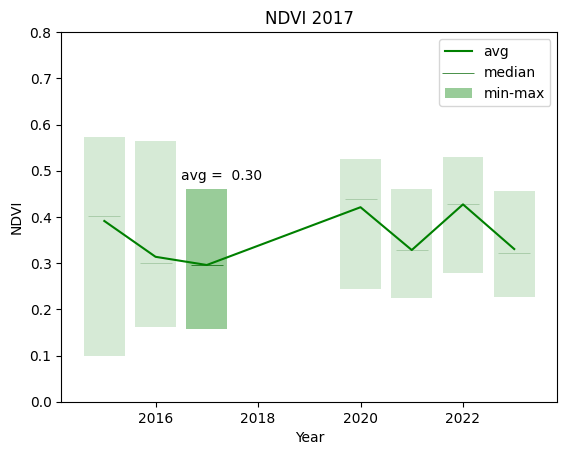

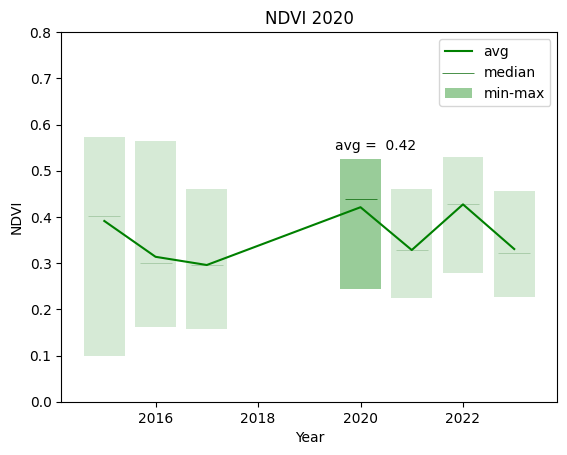

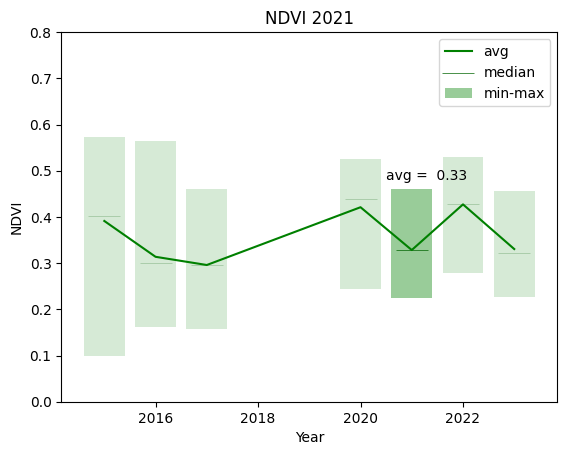

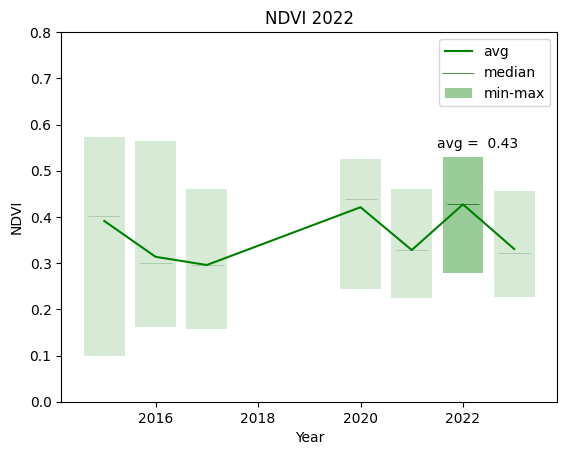

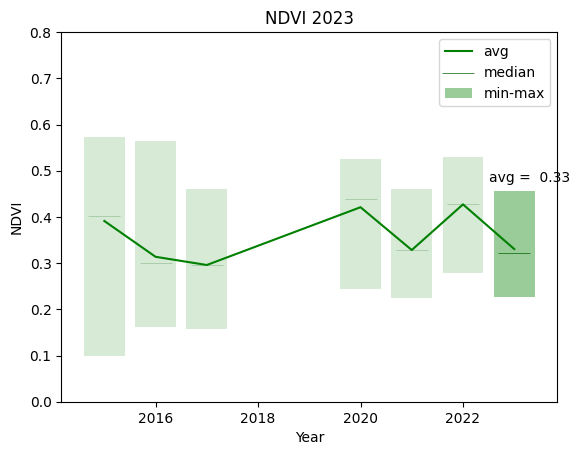

In [18]:
# iterate over the years and save the figure
for year in df_ndvi["year"]:
    highlight_NDVI_year(df_ndvi, year)
    print(f"Plot for {year} saved!")
print("finished!")

In [19]:
# The next step we concatnate the satellite image from QGIS and the plot generated above. 
# The issue is that the satellite image is too large, so we will proceed to image manipulation on both input
# satellite image -> crop to (...x...)
# plot image -> bigger to (...x...)

In [20]:
# My version, which work fine, but for some reason, when saving the figure the ratio aspect was not preserved

"""
def highlight_NDVI_year_figsize(df, highlight_year, size_w, size_h, my_dpi=100, savepath="result/plot/"):

    w_in=size_w/my_dpi
    h_in=size_h/my_dpi

    plt.figure(figsize=(w_in, h_in))

    fig, ax = plt.subplots()

    min_val=df["min"]
    max_val=df["max"]
    diff=max_val-min_val

    # Plot the max bars
    ax.bar(df["year"], diff, bottom=min_val, color="green", alpha=0.4, label="min-max")

    # Plot the average line
    ax.plot(df["year"], df["avg"], color="green",label="avg")

    # Plot horizontal line (median)
    ax.scatter(df["year"],df["median"], s=500,c="darkgreen", marker="_", linewidths=0.5, label="median")

    # Highlight the year X
    ndvi_value=float(df.loc[df['year'] == highlight_year, "avg"].iloc[0])
    max_value_y = float(df.loc[df['year'] == highlight_year,"max"].iloc[0])
    if highlight_year==2015:
        ax.axvspan(highlight_year+0.5,2023+0.5, color="white", alpha=0.6)
    elif highlight_year==2023:
        ax.axvspan(2015-0.5,highlight_year-0.5, color="white", alpha=0.6)
    else:
        ax.axvspan(2015-0.5,highlight_year-0.5, color="white", alpha=0.6)
        ax.axvspan(highlight_year+0.5,2023+0.5, color="white", alpha=0.6)

    ax.text(highlight_year-0.5, max_value_y+0.02, f"avg = {ndvi_value: .2f}")

    #set y-axis limit
    ax.set_ylim(0,0.8)

    # Set axis labels and title
    ax.set_xlabel("Year")
    ax.set_ylabel("NDVI")
    ax.set_title(f"NDVI {highlight_year}")

    # Add a legend
    ax.legend()

    #plt.show(False)

    # Save figure
    filename = f"{highlight_year}.png"
    full_path = os.path.join(savepath, filename)
    plt.savefig(full_path, bbox_inches='tight')

    """

'\ndef highlight_NDVI_year_figsize(df, highlight_year, size_w, size_h, my_dpi=100, savepath="result/plot/"):\n\n    w_in=size_w/my_dpi\n    h_in=size_h/my_dpi\n\n    plt.figure(figsize=(w_in, h_in))\n\n    fig, ax = plt.subplots()\n\n    min_val=df["min"]\n    max_val=df["max"]\n    diff=max_val-min_val\n\n    # Plot the max bars\n    ax.bar(df["year"], diff, bottom=min_val, color="green", alpha=0.4, label="min-max")\n\n    # Plot the average line\n    ax.plot(df["year"], df["avg"], color="green",label="avg")\n\n    # Plot horizontal line (median)\n    ax.scatter(df["year"],df["median"], s=500,c="darkgreen", marker="_", linewidths=0.5, label="median")\n\n    # Highlight the year X\n    ndvi_value=float(df.loc[df[\'year\'] == highlight_year, "avg"].iloc[0])\n    max_value_y = float(df.loc[df[\'year\'] == highlight_year,"max"].iloc[0])\n    if highlight_year==2015:\n        ax.axvspan(highlight_year+0.5,2023+0.5, color="white", alpha=0.6)\n    elif highlight_year==2023:\n        ax.axvsp

In [21]:
# Try ChatGPT correction

def highlight_NDVI_year_figsize(df, highlight_year, size_w, size_h, my_dpi=100, savepath="result/plot/"):
    # Convert width and height from pixels to inches
    width_in = size_w / my_dpi
    height_in = size_h / my_dpi

    # Create a figure with the desired size and DPI
    fig, ax = plt.subplots(figsize=(width_in, height_in), dpi=my_dpi)

    # Your plotting code here
    min_val = df["min"]
    max_val = df["max"]
    diff = max_val - min_val

    # Plot the max bars
    ax.bar(df["year"], diff, bottom=min_val, color="green", alpha=0.4, label="min-max")

    # Plot the average line
    ax.plot(df["year"], df["avg"], color="green", label="avg")

    # Plot horizontal line (median)
    ax.scatter(df["year"], df["median"], s=500, c="darkgreen", marker="_", linewidths=0.5, label="median")

    # Highlight the year X
    ndvi_value = float(df.loc[df['year'] == highlight_year, "avg"].iloc[0])
    max_value_y = float(df.loc[df['year'] == highlight_year, "max"].iloc[0])
    
    if highlight_year == 2015:
        ax.axvspan(highlight_year + 0.5, 2023 + 0.5, color="white", alpha=0.6)
    elif highlight_year == 2023:
        ax.axvspan(2015 - 0.5, highlight_year - 0.5, color="white", alpha=0.6)
    else:
        ax.axvspan(2015 - 0.5, highlight_year - 0.5, color="white", alpha=0.6)
        ax.axvspan(highlight_year + 0.5, 2023 + 0.5, color="white", alpha=0.6)

    ax.text(highlight_year - 0.5, max_value_y + 0.02, f"avg = {ndvi_value:.2f}")

    # Set y-axis limit
    ax.set_ylim(0, 0.8)

    # Set axis labels and title
    ax.set_xlabel("Year")
    ax.set_ylabel("NDVI")
    ax.set_title(f"NDVI {highlight_year}", fontsize=16, weight='bold' ,pad=20)

    # Add a legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.5)
    

    # Save the figure
    if not os.path.exists(savepath):
        os.makedirs(savepath)
    
    filename = f"{highlight_year}.png"
    full_path = os.path.join(savepath, filename)
    fig.savefig(full_path, dpi=my_dpi, bbox_inches='tight')

    # Optionally, show the plot
    plt.show()


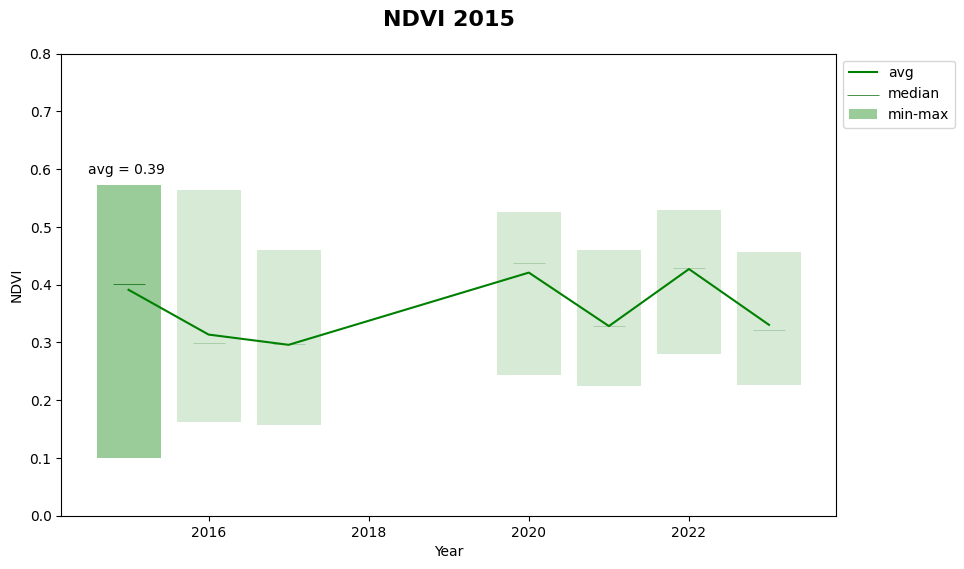

Plot for 2015 saved!


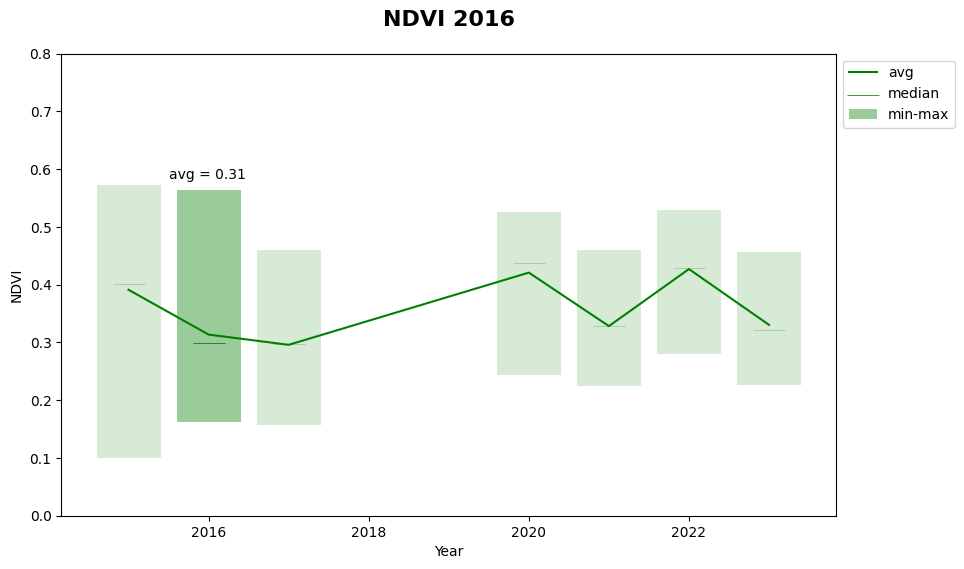

Plot for 2016 saved!


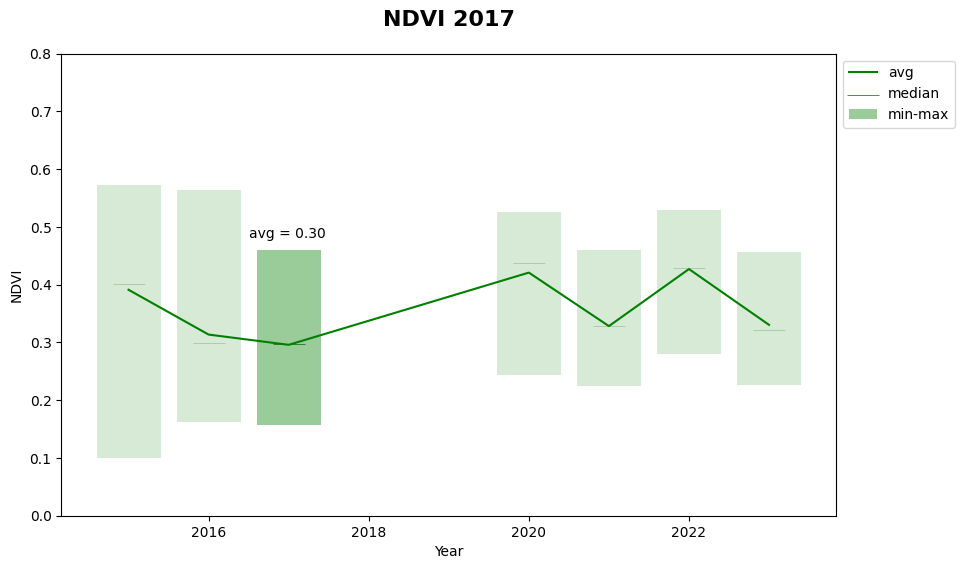

Plot for 2017 saved!


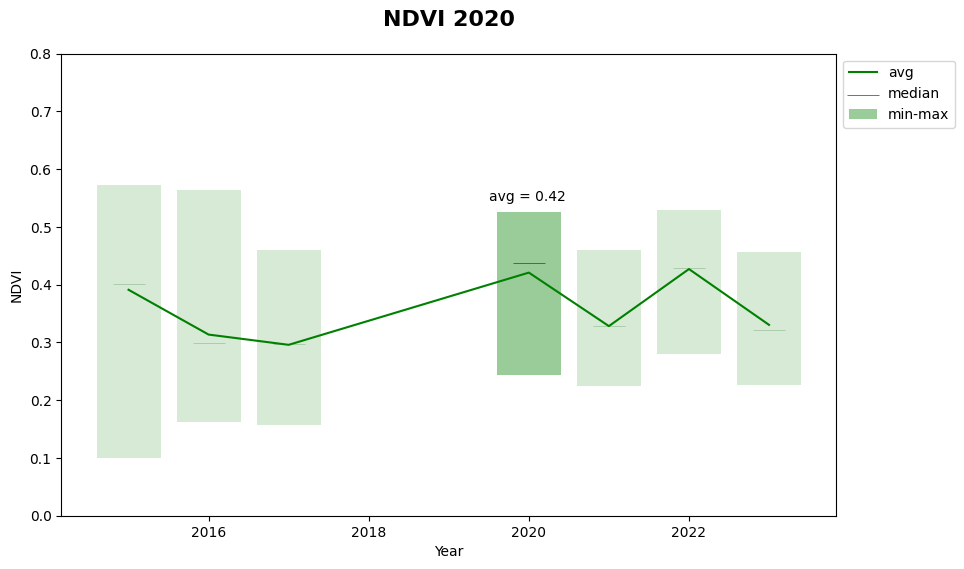

Plot for 2020 saved!


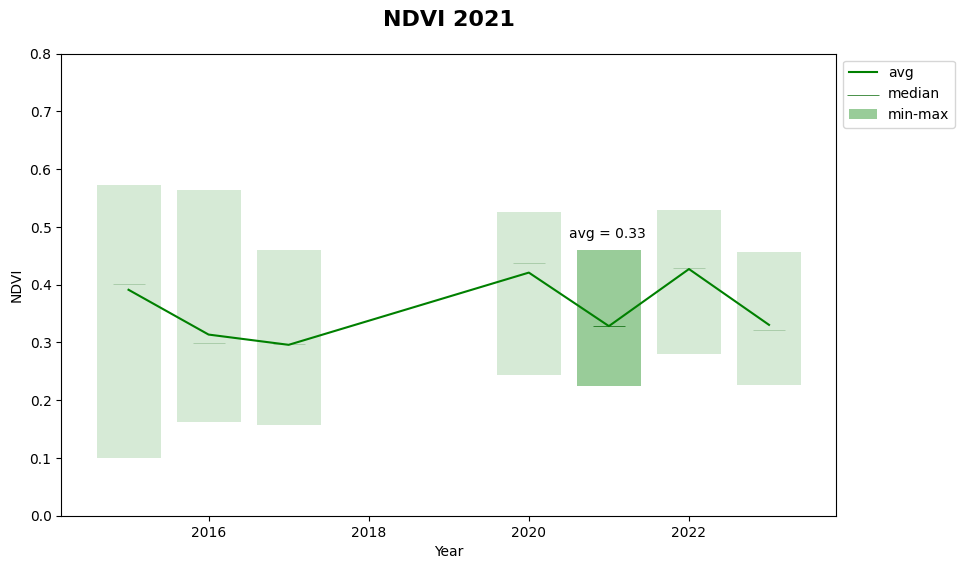

Plot for 2021 saved!


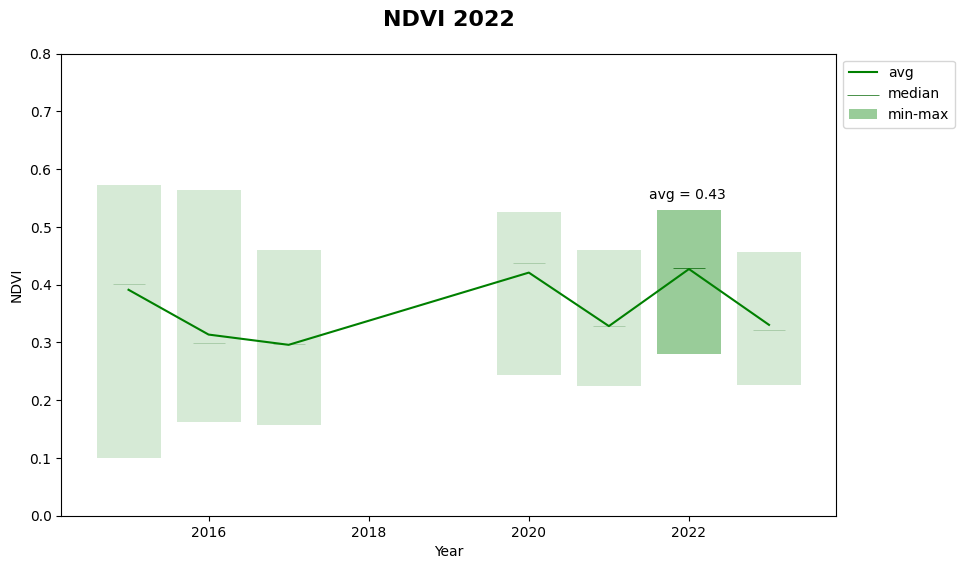

Plot for 2022 saved!


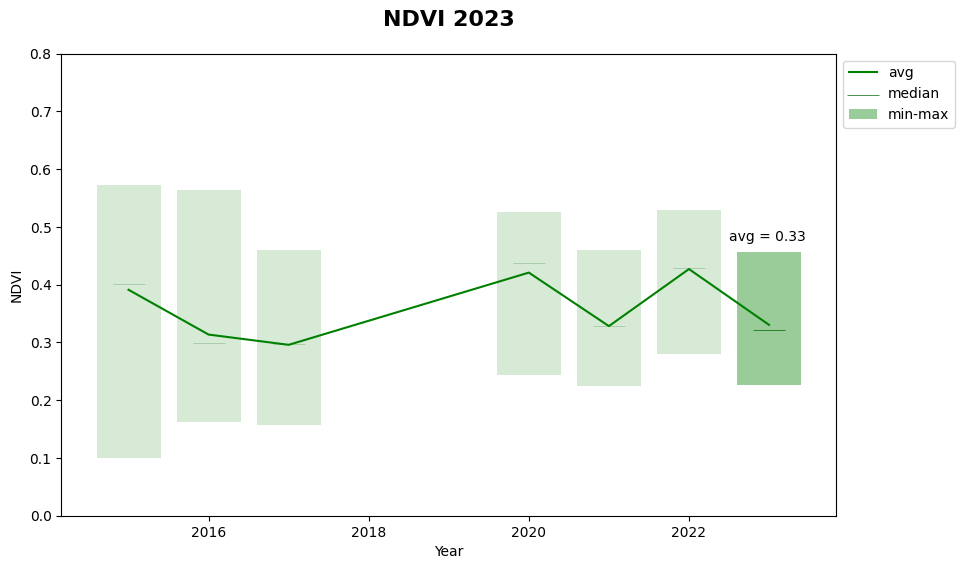

Plot for 2023 saved!
finished!


In [22]:
for year in df_ndvi["year"]:
    highlight_NDVI_year_figsize(df_ndvi, year, 1000, 600) #size in pixels
    print(f"Plot for {year} saved!")
print("finished!")

## Stacked 2 images 

In [36]:
from PIL import Image

In [37]:
NDVI_2015=Image.open("result/NDVI_img/Triibo-2015.png")
w_ndvi, h_ndvi = NDVI_2015.size
print(f"width image: {w_ndvi}")
print(f"height image: {h_ndvi}")

plot_2015=Image.open("result/plot/2015.png")
w_plot, h_plot = plot_2015.size
print(f"width plot: {w_plot}")
print(f"height plot: {h_plot}")


width image: 1000
height image: 441
width plot: 964
height plot: 569


In [40]:
# Add a blank band on the right of the shortest image (supposed to be the im2 (plot)), this function can be improved

def add_blank_band(im1, im2, fill_color=(255, 255, 255)):
    # Ensure im1 is wider than im2 by filling im2 with blank space if needed
    if im1.width > im2.width:
        # Create a new image with the same width as im1 and height of im2
        new_im2 = Image.new('RGB', (im1.width, im2.height), fill_color)
        # Paste im2 onto the new image
        new_im2.paste(im2, (0, 0))
        return new_im2
    else:
        # If im2 is already the same width or wider, return im2 as is
        return im2

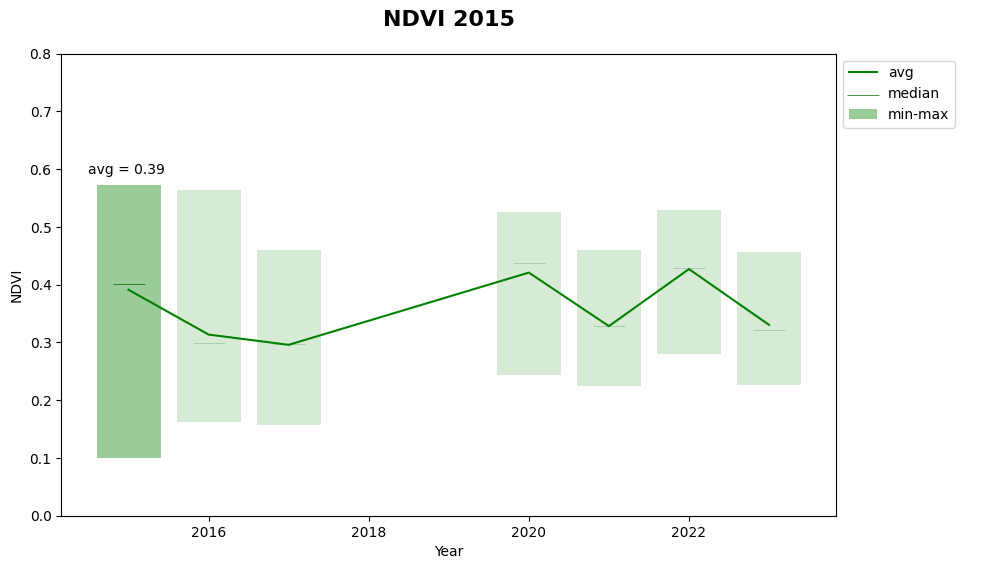

In [41]:
plot_2015_adj=add_blank_band(NDVI_2015,plot_2015)
plot_2015_adj

In [42]:
def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

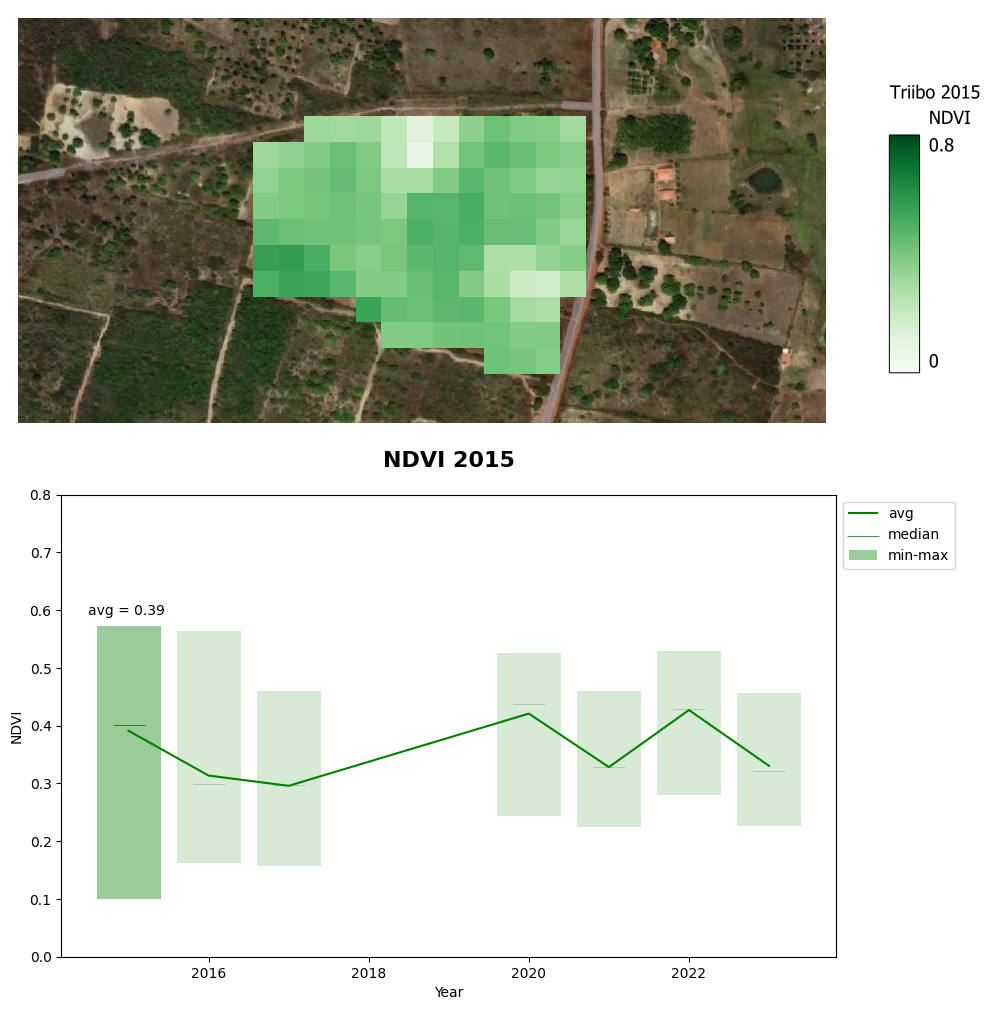

In [43]:
final_image=get_concat_v(NDVI_2015,plot_2015_adj)
final_image

In [45]:
# It is perfect!!! let's  create all those images

# First we create dictionary with the filename and the year

def get_files_dict(folder_path, prefix="", suffix=""):
    """Get a dictionary of files in a folder keyed by the year extracted from filenames."""
    files_dict = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            # Extract the year part from the filename
            year = filename.replace(prefix, "").replace(suffix, "").replace(".png", "")
            if year.isdigit():
                files_dict[year] = os.path.join(folder_path, filename)
    return files_dict

In [47]:
plot_dict = get_files_dict("result/plot/")
plot_dict

{'2015': 'result/plot/2015.png',
 '2016': 'result/plot/2016.png',
 '2017': 'result/plot/2017.png',
 '2020': 'result/plot/2020.png',
 '2021': 'result/plot/2021.png',
 '2022': 'result/plot/2022.png',
 '2023': 'result/plot/2023.png'}

In [49]:
img_dict = get_files_dict("result/NDVI_img/", "Triibo-")
img_dict

{'2015': 'result/NDVI_img/Triibo-2015.png',
 '2016': 'result/NDVI_img/Triibo-2016.png',
 '2017': 'result/NDVI_img/Triibo-2017.png',
 '2020': 'result/NDVI_img/Triibo-2020.png',
 '2021': 'result/NDVI_img/Triibo-2021.png',
 '2022': 'result/NDVI_img/Triibo-2022.png',
 '2023': 'result/NDVI_img/Triibo-2023.png'}

In [59]:
years = list(plot_dict.keys())

In [60]:
# Now let's process the image

for year in years:

    path_img=img_dict[year]
    img = Image.open(path_img)

    path_plot=plot_dict[year]
    plot = Image.open(path_plot)

    # Add white band to the shortest image
    plot_adj = add_blank_band(img, plot)

    # Stack (vertically) pictures
    final_img=get_concat_v(img, plot_adj)

    # Save image
    saving_path = "result/final_output/"
    filename = f"NDVI_Triibo_{year}.png"
    full_path = os.path.join(saving_path,filename)
    final_img.save(full_path)


## Make a gif

In [64]:
from PIL import Image

In [66]:
gif_dict = get_files_dict("result/final_output/","NDVI_Triibo_")
gif_dict

{'2015': 'result/final_output/NDVI_Triibo_2015.png',
 '2016': 'result/final_output/NDVI_Triibo_2016.png',
 '2017': 'result/final_output/NDVI_Triibo_2017.png',
 '2020': 'result/final_output/NDVI_Triibo_2020.png',
 '2021': 'result/final_output/NDVI_Triibo_2021.png',
 '2022': 'result/final_output/NDVI_Triibo_2022.png',
 '2023': 'result/final_output/NDVI_Triibo_2023.png'}

In [70]:
def create_gif(image_files, output_path, duration=500, loop=0):
    """
    Create a GIF from a list of image files.
    
    Parameters:
        image_files (list of str): List of paths to image files.
        output_path (str): Path where the GIF will be saved.
        duration (int): Duration between frames in milliseconds.
        loop (int): Number of times the GIF should loop (0 means infinite loop).
    """
    images = [Image.open(image_file) for image_file in image_files]
    images[0].save(output_path, save_all=True, append_images=images[1:], duration=duration, loop=loop)
    print("Gif createad!")

In [72]:
# Create GIF
image_files = list(gif_dict.values())
output_path = 'result/gif/NDVI-Triibo_1000ms.gif'
create_gif(image_files, output_path, duration=1000, loop=0)

Gif createad!
